<a href="https://colab.research.google.com/github/Raghavgali/Toxic_Comment_Classification/blob/main/Toxic_Comment_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pickle
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize, pos_tag
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords as nltk_stopwords
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_curve

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
df.count()

count                       24783
hate_speech_count           24783
offensive_language_count    24783
neither_count               24783
class                       24783
tweet                       24783
dtype: int64

In [5]:
df.dtypes

count                        int64
hate_speech_count            int64
offensive_language_count     int64
neither_count                int64
class                        int64
tweet                       object
dtype: object

In [6]:
df.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

<Axes: xlabel='count', ylabel='Count'>

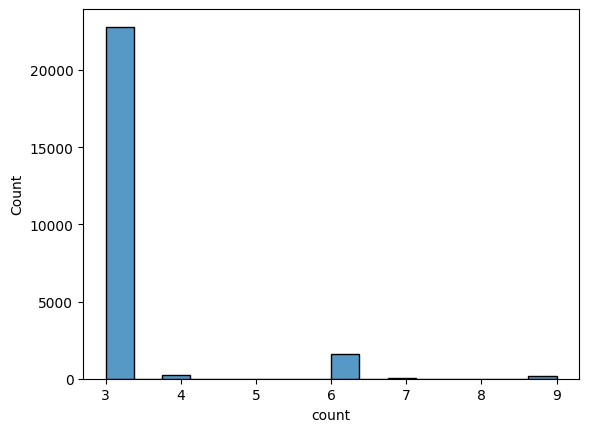

In [8]:
sns.histplot(df['count'])

<Axes: xlabel='hate_speech_count', ylabel='Count'>

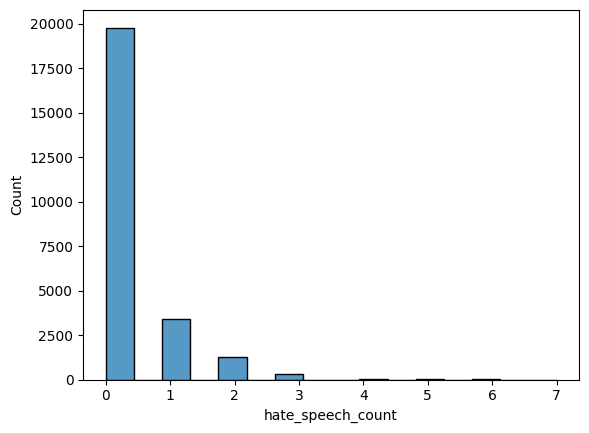

In [9]:
sns.histplot(df['hate_speech_count'])

<Axes: xlabel='offensive_language_count', ylabel='Count'>

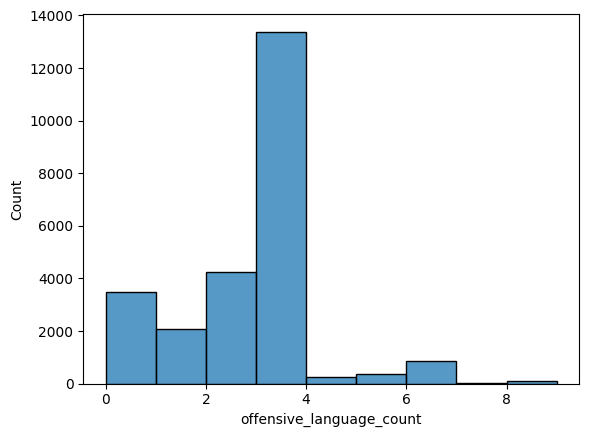

In [10]:
sns.histplot(df['offensive_language_count'], binwidth=1)

<Axes: xlabel='neither_count', ylabel='Count'>

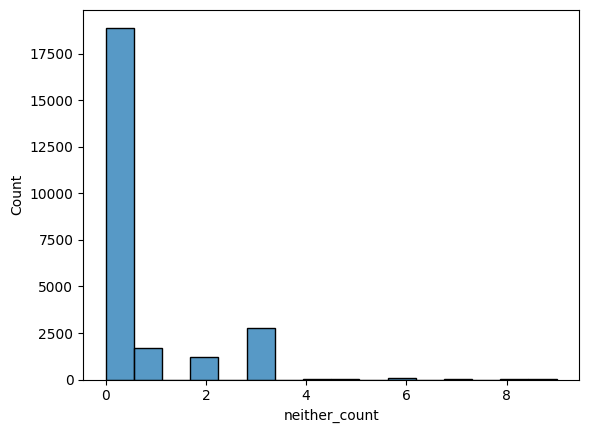

In [11]:
sns.histplot(df['neither_count'])

In [12]:
df1=df.copy()
df1=df1.drop(['class'], axis=1)

In [13]:
df1.corr()

<ipython-input-13-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,count,hate_speech_count,offensive_language_count,neither_count
count,1.000000,0.101926,0.534604,0.063326
hate_speech_count,0.101926,1.000000,-0.261808,-0.157599
offensive_language_count,0.534604,-0.261808,1.000000,-0.684406
neither_count,0.063326,-0.157599,-0.684406,1.000000


## Finding Highly correlated columns

In [14]:
for i in df1.corr().columns:
  for j in df1.corr().index:
    if(df1.corr()[i][j]>0.7 or df1.corr()[i][j]<-0.7):
      if(df1.corr()[i][j]!=1):
        print(i,j)

<ipython-input-14-7e0b288b5331>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for i in df1.corr().columns:
<ipython-input-14-7e0b288b5331>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  for j in df1.corr().index:
<ipython-input-14-7e0b288b5331>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  if(df1.corr()[i][j]>0.7 or df1.corr()[i][j]<-0.7):
<ipython-input-14-7e0b288b5331>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future ve

In [15]:
df1.corr()

<ipython-input-15-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,count,hate_speech_count,offensive_language_count,neither_count
count,1.000000,0.101926,0.534604,0.063326
hate_speech_count,0.101926,1.000000,-0.261808,-0.157599
offensive_language_count,0.534604,-0.261808,1.000000,-0.684406
neither_count,0.063326,-0.157599,-0.684406,1.000000


In [16]:
df1.corr().index

<ipython-input-16-0dbc8bb1ac8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr().index


Index(['count', 'hate_speech_count', 'offensive_language_count',
       'neither_count'],
      dtype='object')

### Changing the labels from 0,1,2 to 0,1 for binary classification

In [17]:
df['class'] = df['class'].replace({0:0, 1:0, 2:1})

# Preprocessing

### Removing url from the tweets

In [18]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub('https?://\S+|www\.\S+', '', str(x)))
df['tweet']

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

### Removing special characters from the tweet

In [19]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub('[^\w\s]', '', str(x)))
df['tweet']

0         RT mayasolovely As a woman you shouldnt compl...
1         RT mleew17 boy dats coldtyga dwn bad for cuff...
2         RT UrKindOfBrand Dawg RT 80sbaby4life You eve...
3         RT C_G_Anderson viva_based she look like a tr...
4         RT ShenikaRoberts The shit you hear about me ...
                               ...                        
24778    yous a muthafin lie 8220LifeAsKing 20_Pearls c...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like I aint fu...
24781                youu got wild bitches tellin you lies
24782    Ruffled  Ntac Eileen Dahlia  Beautiful color c...
Name: tweet, Length: 24783, dtype: object

### Removing Numbers from the tweet

In [20]:
df['tweet'] = df['tweet'].apply(lambda x: re.sub('[0-9]', '', str(x)))
df['tweet']

0         RT mayasolovely As a woman you shouldnt compl...
1         RT mleew boy dats coldtyga dwn bad for cuffin...
2         RT UrKindOfBrand Dawg RT sbabylife You ever f...
3         RT C_G_Anderson viva_based she look like a tr...
4         RT ShenikaRoberts The shit you hear about me ...
                               ...                        
24778    yous a muthafin lie LifeAsKing _Pearls corey_e...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like I aint fu...
24781                youu got wild bitches tellin you lies
24782    Ruffled  Ntac Eileen Dahlia  Beautiful color c...
Name: tweet, Length: 24783, dtype: object

### Removing Uppercase

In [21]:
df['tweet'] = df['tweet'].apply(lambda x: x.lower())
df['tweet']

0         rt mayasolovely as a woman you shouldnt compl...
1         rt mleew boy dats coldtyga dwn bad for cuffin...
2         rt urkindofbrand dawg rt sbabylife you ever f...
3         rt c_g_anderson viva_based she look like a tr...
4         rt shenikaroberts the shit you hear about me ...
                               ...                        
24778    yous a muthafin lie lifeasking _pearls corey_e...
24779    youve gone and broke the wrong heart baby and ...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

### Removing rt and : from the tweets

In [22]:
def to_remove_rt(text):
  word_to_remove = ["rt"]
  for word in word_to_remove:
    text = text.replace(word,"")
  text = text.replace(":", "")
  return text
df['tweet'] = df['tweet'].apply(to_remove_rt)
df['tweet']

0          mayasolovely as a woman you shouldnt complai...
1          mleew boy dats coldtyga dwn bad for cuffin d...
2          urkindofbrand dawg  sbabylife you ever fuck ...
3           c_g_anderson viva_based she look like a tranny
4          shenikarobes the shit you hear about me migh...
                               ...                        
24778    yous a muthafin lie lifeasking _pearls corey_e...
24779    youve gone and broke the wrong hea baby and dr...
24780    young buck wanna eat dat nigguh like i aint fu...
24781                youu got wild bitches tellin you lies
24782    ruffled  ntac eileen dahlia  beautiful color c...
Name: tweet, Length: 24783, dtype: object

### Removing stop words

In [23]:
stopwords = set(nltk_stopwords.words('english'))
def to_remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stopwords])
df['tweet'] = df['tweet'].apply(to_remove_stopwords)

## Feature Engineering

### Tokenization

In [24]:
df['clean_tweet'] = df['tweet'].apply(lambda x: word_tokenize(x))
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,clean_tweet
0,3,0,0,3,1,mayasolovely woman shouldnt complain cleaning ...,"[mayasolovely, woman, shouldnt, complain, clea..."
1,3,0,3,0,0,mleew boy dats coldtyga dwn bad cuffin dat hoe...,"[mleew, boy, dats, coldtyga, dwn, bad, cuffin,..."
2,3,0,3,0,0,urkindofbrand dawg sbabylife ever fuck bitch s...,"[urkindofbrand, dawg, sbabylife, ever, fuck, b..."
3,3,0,2,1,0,c_g_anderson viva_based look like tranny,"[c_g_anderson, viva_based, look, like, tranny]"
4,6,0,6,0,0,shenikarobes shit hear might true might faker ...,"[shenikarobes, shit, hear, might, true, might,..."


### Lemmatization

In [25]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  lemma = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemma
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : lemmatize(x))

In [26]:
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,clean_tweet
0,3,0,0,3,1,mayasolovely woman shouldnt complain cleaning ...,"[mayasolovely, woman, shouldnt, complain, clea..."
1,3,0,3,0,0,mleew boy dats coldtyga dwn bad cuffin dat hoe...,"[mleew, boy, dat, coldtyga, dwn, bad, cuffin, ..."
2,3,0,3,0,0,urkindofbrand dawg sbabylife ever fuck bitch s...,"[urkindofbrand, dawg, sbabylife, ever, fuck, b..."
3,3,0,2,1,0,c_g_anderson viva_based look like tranny,"[c_g_anderson, viva_based, look, like, tranny]"
4,6,0,6,0,0,shenikarobes shit hear might true might faker ...,"[shenikarobes, shit, hear, might, true, might,..."


## Data Modelling

In [27]:
corpus = df['clean_tweet'].str.join(' ').values.astype('U')

In [28]:
tf_idf_vectoriser = TfidfVectorizer()
tf_idf = tf_idf_vectoriser.fit_transform(corpus)

## Creating a endpoint for the application

In [29]:
pickle.dump(tf_idf, open('tf_idf.pkt', 'wb'))

## Splitting the dataset into train and test

In [30]:
X_train, X_test, y_train, y_test = train_test_split(tf_idf, df['class'], test_size=0.2)

In [31]:
X_train.shape

(19826, 31525)

In [32]:
y_train.shape

(19826,)

In [33]:
def model_evaluate(model, X_test):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)

  plt.title('Confusion Matrix')
  sns.heatmap(cm, annot=True, cmap='Blues')
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.show()

## Naive Bayes

In [34]:
model_bayes = MultinomialNB()
model_bayes.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4115
           1       0.95      0.13      0.23       842

    accuracy                           0.85      4957
   macro avg       0.90      0.57      0.57      4957
weighted avg       0.87      0.85      0.80      4957



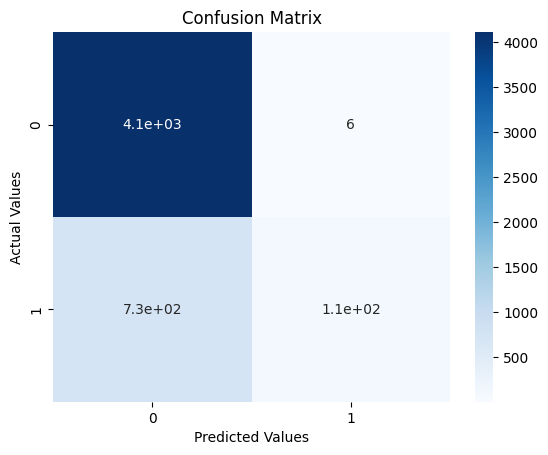

In [35]:
model_evaluate(model_bayes, X_test)

### Logistic Regression

In [36]:
log = LogisticRegression(C = 1, max_iter = 1000, penalty = 'l2', n_jobs=-1, multi_class='ovr')

In [37]:
log.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=1000, multi_class='ovr', n_jobs=-1)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4115
           1       0.87      0.70      0.77       842

    accuracy                           0.93      4957
   macro avg       0.91      0.84      0.87      4957
weighted avg       0.93      0.93      0.93      4957



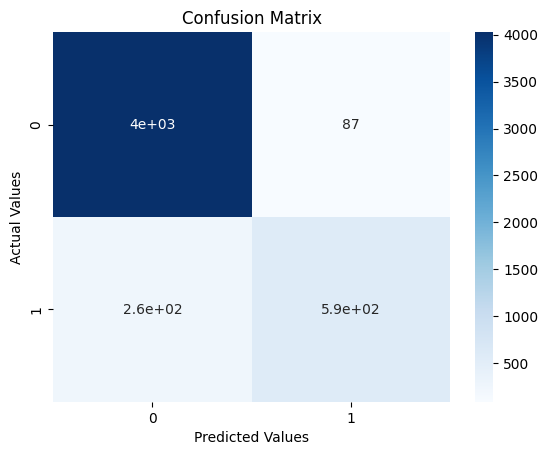

In [38]:
model_evaluate(log, X_test)

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtc = dtmodel.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4115
           1       0.82      0.85      0.84       842

    accuracy                           0.94      4957
   macro avg       0.90      0.91      0.90      4957
weighted avg       0.94      0.94      0.94      4957



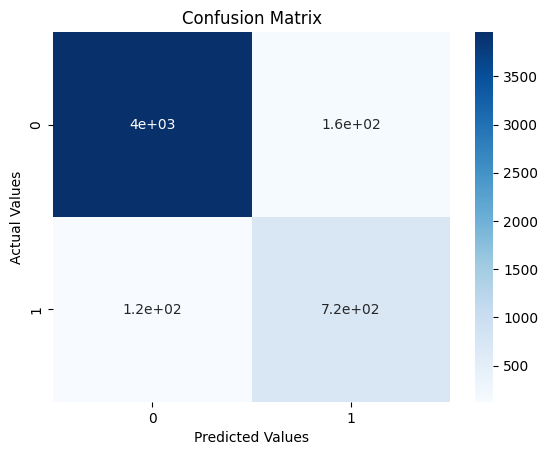

In [40]:
model_evaluate(dtc, X_test)

## KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=30)
neigh.fit(X_train  ,y_train)

KNeighborsClassifier(n_neighbors=30)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4115
           1       0.93      0.19      0.31       842

    accuracy                           0.86      4957
   macro avg       0.89      0.59      0.62      4957
weighted avg       0.87      0.86      0.82      4957



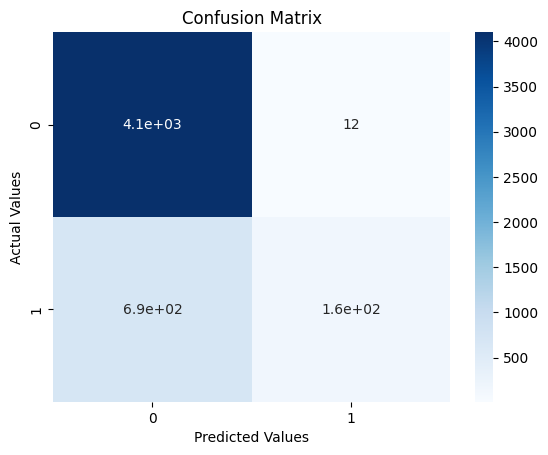

In [42]:
model_evaluate(neigh, X_test)

## Saving the best model to use in the app

### Out of the four models we can see that logistic regression is performing the best. Therefore we are gonna use that for application

In [43]:
pickle.dump(log, open('toxicity_model.pkt', 'wb'))